# Assignment Netwerkanalyse

## Notebook made by

**Gebruik graag dit formaat**

* Voor de namen:  voornaam rest van je naam, voornaam rest van je naam,....
* je studentnummers: hetzelfde: scheidt met `,`
* je emails: hetzelfde: scheidt met `,`
* voor je groep: alleen de hoofdletter (dus voor de groep van Marx zou je `A` kiezen)

__Namen__:Anoniem
__Emails__:Anoniem
__Student id__:Anoniem
__Groep__:Anoniem

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

# Week 6

In [1]:
%matplotlib inline
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from nose.tools import assert_equal, assert_count_equal
from numpy.testing import assert_almost_equal
import math

# First Course: chap 3.3 Friendship Paradox

1. Maak een netwerkx netwerk van Figuur 3.5.
2. Waarom is de kans dat je Tom vindt met de "random friend of picked person" methode $\frac{5}{21}$. Geef een heel helder antwoord.
3. Programmeer de functie `kans_op_knoop(G,knoop)` die voor elk netwerk, voor elke knoop de kans berekent dat je die knoop trekt met de "random friend of picked person" methode.
4. Schrijf een test die checked dat die kansen optellen tot 1.
5. **Advanced** In de een na laatste paragraaf van 3.3 op blz 76 wordt een andere manier om die kansen te berekenen gemeld, die dezelfde uitkomst geeft. Programmeer die ook, en vergelijk de uitkomsten.
    

0.23809523809523805

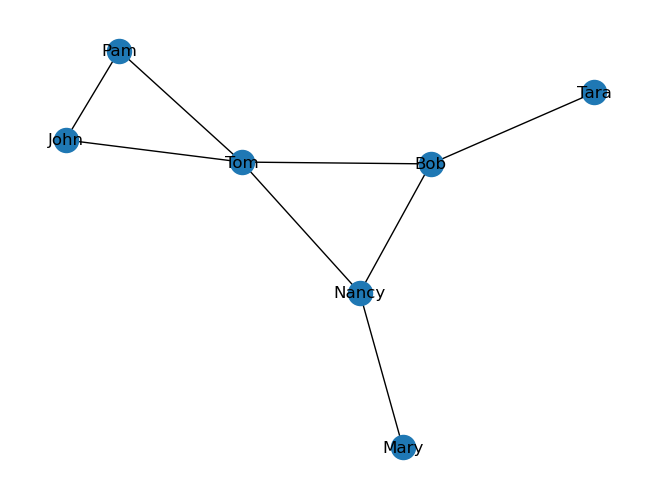

In [2]:
# vraag 1
Fig35=nx.Graph()
Fig35.add_edges_from([('Mary', 'Nancy'), ('Pam', 'John'), ('Bob', 'Tom'), ('Nancy', 'Tom'), ('Nancy', 'Bob'), ('Bob', 'Tara'),('Tom', 'John'), ('Tom', 'Pam')])
nx.draw(Fig35, with_labels = True)

# vraag 2
# Het is 5/21 omdat er in totaal 21 mogelijke vriendschappen zijn, omdat er zeven personen zijn die met zes personen bevriend 
# kunnen zijn dus 7 * 6, maar dit is een ongericht netwerk dus delen we het door 2. Dus in totaal 21
# De kans dat een persoon gekozen wordt is 1 op de zeven, daarna vermenigvuldigen we dit met de kans dat deze persoon
# een vriend is van Tom. Deze waarden tellen we bij elkaar op. Het wordt dus ((1/7) * (1/3)) + ((1/7) * (1/3)) +
# ((1/7) * (1/2))  + ((1/7) * (1/2)).

# vraag 3
def kans_op_knoop(G, knoop):
    kans = 1 / len(G.nodes())
    lijst = []
    for i in G:
        if G.has_edge(i, knoop) == 0:
            continue
        else:
            lijst.append((1 / len(list(nx.neighbors(G, i)))) * kans)
    return sum(lijst)

H = nx.karate_club_graph() 
sum(kans_op_knoop(H,x) for x in H)
kans_op_knoop(H, 1)


# Opdracht 4
testlijst = []
for i in Fig35.nodes:
    testlijst.append(kans_op_knoop(Fig35,i))
test = sum(testlijst)
kans_op_knoop(Fig35, 'Tom')


kans_op_knoop(Fig35, 'Tom')
kans_op_knoop(Fig35, 'Tom')
# Opdracht 5

def moeilijk(G, knoop):
    kans = 1 / len(G.nodes())
    sommoeilijk = []
    totaleLijst = []
    vriendenvangekozenknoop = nx.subgraph(G, list(nx.neighbors(G, knoop)))
    for i in vriendenvangekozenknoop:

        sommoeilijk.append((list(nx.neighbors(G, i))))
    for i in sommoeilijk:
        totaleLijst.append(1 / len(i))
    return (sum(totaleLijst) * kans)
    #print((sum(sommoeilijk)/ len(vriendenvangekozenknoop.nodes())) ) 
moeilijk(Fig35, 'Tom')

In [3]:
assert isinstance(Fig35, nx.Graph)
H= nx.karate_club_graph()
assert 0 <= kans_op_knoop(H,1)<= 1


# First course

Maak de sommen 3.11-3.24.

[2, 3, 5] [2, 5] [2]


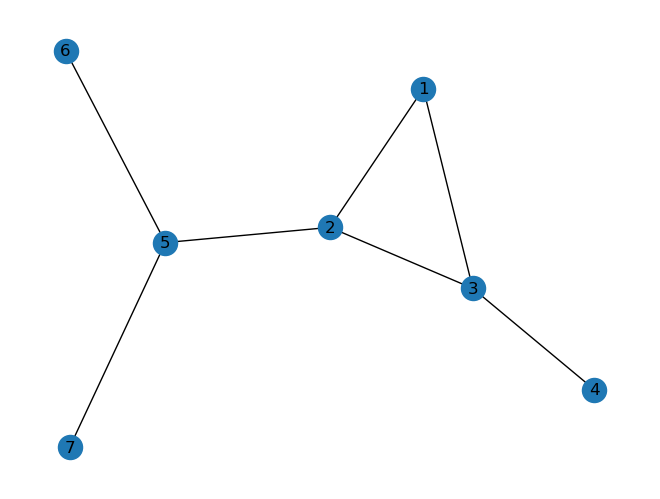

In [4]:
# 3.11
G = nx.Graph()
G.add_edges_from([(1,2), (1,3), (2,5), (2,3), (5,6), (5,7), (3,4)])
nx.draw(G, with_labels = True)

# 1
Antwoord1 = [node for node in G.nodes if nx.degree_centrality(G)[node] == max(nx.degree_centrality(G).values())]

# 2 
Antwoord2 = [node for node in G.nodes if nx.betweenness_centrality(G)[node] == max(nx.betweenness_centrality(G).values())]

# 3 
Antwoord3 = [node for node in G.nodes if nx.closeness_centrality(G)[node] == max(nx.closeness_centrality(G).values())]
print(Antwoord1, Antwoord2, Antwoord3)

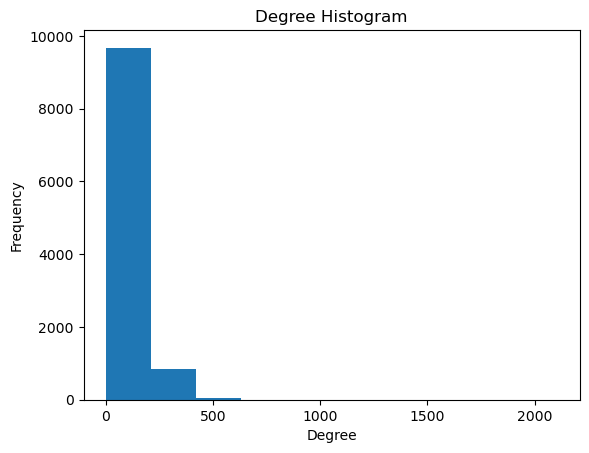

In [5]:
# 3.24
fname= '../../../data/Week6/socfb-Northwestern25.edges.gz'
G= nx.Graph()

G = nx.read_edgelist(fname)

# 1
groterdan100 = []
for i in G:
    if G.degree(i) >= 100:
        groterdan100.append(i)
Antwoord1 = (len(groterdan100)/ len(G.nodes()))

# 2
Antwoord2 = max(dict(nx.degree(G)).values())

# 3
Antwoord3 = [node for node in dict(nx.degree(G)) if dict(nx.degree(G))[node] == Antwoord2]

# 4
degrees = [d for n, d in G.degree()]
sorted_degrees = sorted(degrees)
percentile_95 = np.percentile(sorted_degrees, 95)
Antwoord4 = int(percentile_95)
                
# 5
somdegrees = sum([d for n, d in G.degree()])
Antwoord5 = round(somdegrees/ len(G.nodes))

# 6

degrees = [d for n, d in G.degree()]
plt.hist(degrees)
plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Frequency")
    
plt.show()
Antwoord6 = 'C'